# House Price Prediction Linear Regression

## Importing required modules

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Load the Dataset

In [6]:

data = pd.read_csv('house_data.csv')


In [72]:
data

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157
...,...,...,...,...,...,...,...
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313


## Exploratory Data Analysis (EDA)

In [73]:
# Display basic statistics about the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())


              date          age     distance       stores    latitude  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.00000   
mean   2008.912800    18.945000     4.977800     4.915000    84.97140   
std       5.457578    11.329539     3.199837     3.142889     3.16199   
min    2000.000000     0.000000     0.000000     0.000000    80.00000   
25%    2004.000000     9.000000     2.000000     2.000000    82.00000   
50%    2009.000000    19.000000     5.000000     5.000000    85.00000   
75%    2014.000000    29.000000     8.000000     8.000000    88.00000   
max    2018.000000    38.000000    10.000000    10.000000    90.00000   

         longitude         price  
count  5000.000000   5000.000000  
mean    124.994200  13906.638600  
std       3.167992   1020.774876  
min     120.000000  11263.000000  
25%     122.000000  13197.750000  
50%     125.000000  13893.500000  
75%     128.000000  14614.000000  
max     130.000000  16964.000000  
date         0
age         

## Distribution plot for house prices

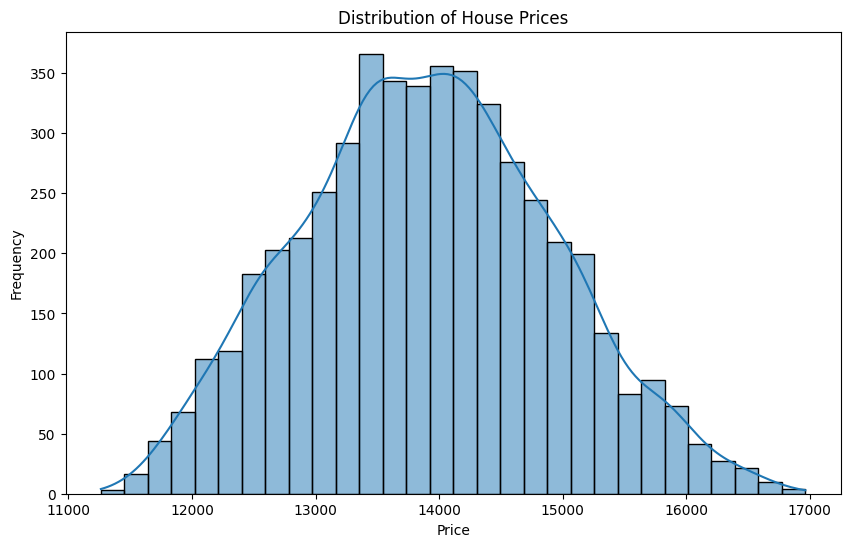

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

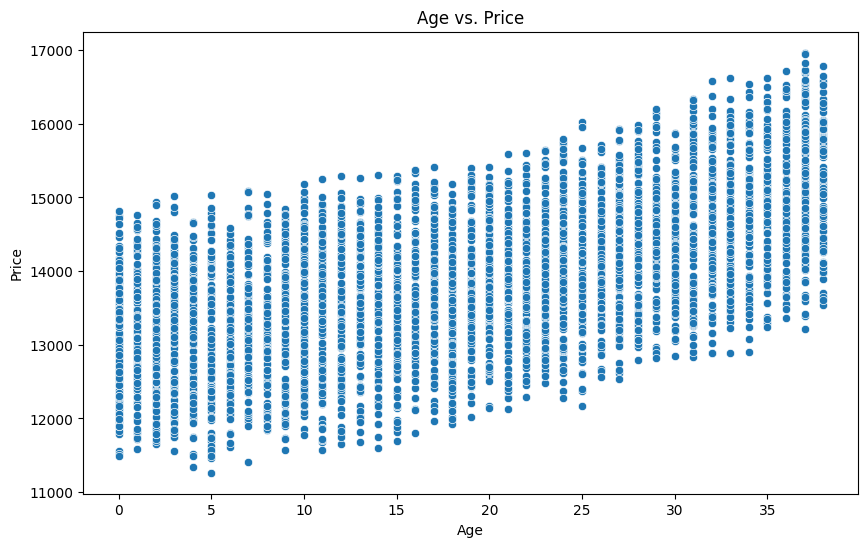

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price', data=data)
plt.title('Age vs. Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

## Correlation heatmap

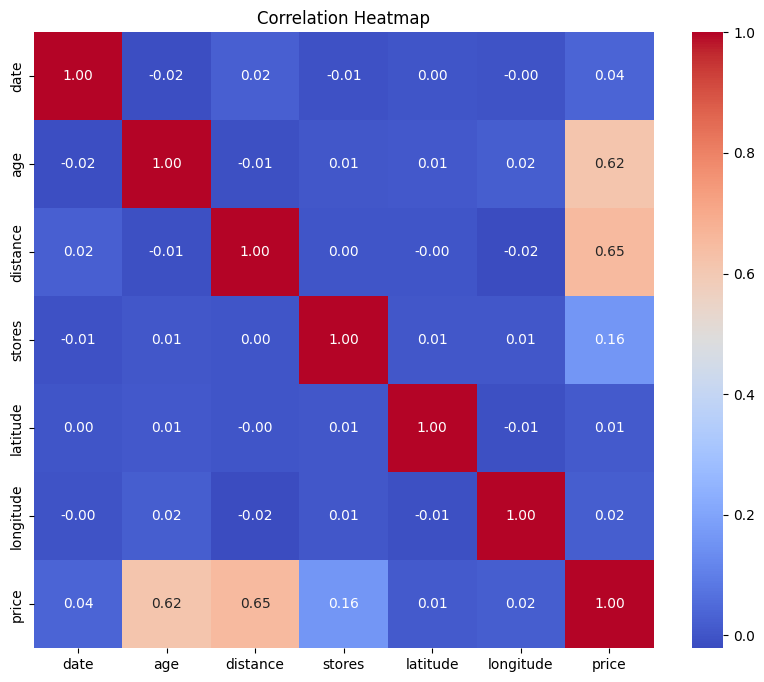

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

In [77]:
# No missing values assumed
# Split dataset into features (X) and target variable (y)
X = data.drop('price', axis=1)  # Assuming 'price' is the target variable
y = data['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Choosing a Model

In [79]:
lr_model = LinearRegression()


In [80]:
tf_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

## Train the Model

In [81]:
lr_model.fit(X_train, y_train)


LinearRegression()

In [82]:
tf_model.compile(optimizer='adam', loss='mean_squared_error')
tf_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)


## Model Evaluation

In [83]:
# Make predictions on the testing set
y_pred_lr = lr_model.predict(X_test)
print('Linear Regression Metrics:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))
print('R-squared:', r2_score(y_test, y_pred_lr))

Linear Regression Metrics:
Mean Absolute Error: 351.5276497284008
Mean Squared Error: 171076.70443194365
R-squared: 0.8396624371700676


In [84]:
# Evaluate Neural Network model
y_pred_nn = tf_model.predict(X_test_scaled).flatten()
print('\nNeural Network Metrics:')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_nn))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_nn))
print('R-squared:', r2_score(y_test, y_pred_nn))

32/32 [==============================] - 0s 2ms/step

Neural Network Metrics:
Mean Absolute Error: 496.978857421875
Mean Squared Error: 377472.53567581176
R-squared: 0.6462228647292471


## Residual plot

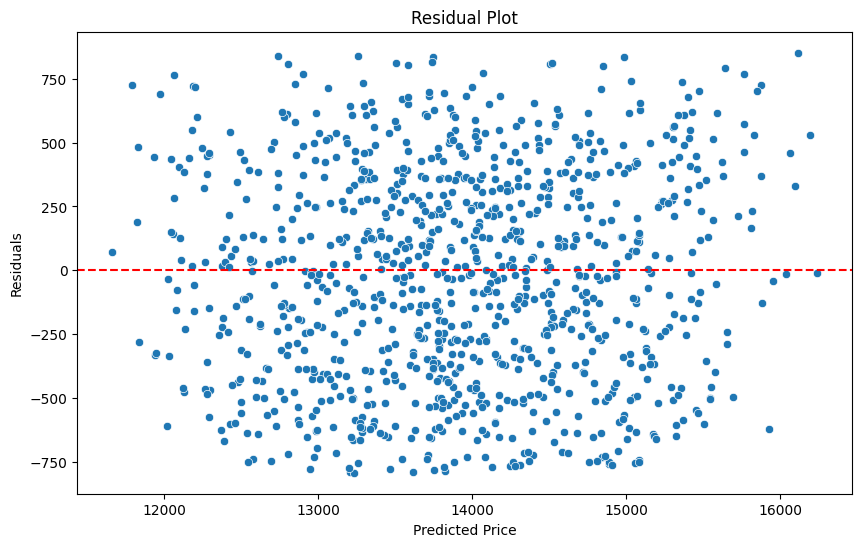

In [89]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

## Prediction

In [88]:
# You can use the trained model to predict house prices for new data if available
# For example:
# Example of filling DataFrame with new data
new_data = pd.DataFrame([
    ['2017', 5, 10, 3, 37.7749, -122.4194],  # Example row 1
    ['2009', 8, 15, 2, 34.0522, -118.2437]   # Example row 2
], columns=['date', 'age', 'distance', 'stores', 'latitude', 'longitude'])

predicted_prices = model.predict(new_data)
print(predicted_prices)


[12337.91356763 13470.85502931]
